# Automatic analysis of RMSF/ D (1st Revision)

Based on codes explained by 
Mohamed Shehata; August 2020; University of California San Diego. 


Before executing these codes, they assume the 'Anaconda' package is installed on your local machine, that MDTraj is installed and MDAnalysis. 


Available from; 

https://www.anaconda.com

https://mdtraj.org/1.9.4/installation.html 

For MDAnalysis please open the terminal on your machine, after Anaconda has been installed and enter; 


conda config --add channels conda-forge

conda install mdanalysis


Both packages have really good installation instructions, and plenty of YouTube videos to help if you get stuck.


G.W.Baker University of Portsmouth



Accessed August 2022. 

In [1]:
import mdtraj as md
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pwd

/Users/georgebaker/Desktop


Now in the ! cd command bellow, move over to where your simulation data is on your machine. Currently it must be a local folder and not on a supercomputer/ server/ etc. 

In [3]:
! cd /Users/georgebaker/Desktop/Sciama-Outputs/New\ Today

Just to check we're working the right folder.

In [4]:
!pwd

/Users/georgebaker/Desktop


Now to change the names of your trajectory file, and pdb.

In [5]:
traj = md.load('step7_production.dcd', top='step5_input.pdb')

Bellow selects every atom within the protein, you call adjust to 'all' if needed, or for a per residue read out add 'protein and name CA'

In [6]:
protein_sel = traj.topology.select('protein')
protein_traj = traj.atom_slice(protein_sel)

Bellow assumes you want to start at the begining of your simulation. If that is not the case then you can adjust the 0 to whichever frame number you wish to start with.

In [7]:
rmsd = md.rmsd(protein_traj, protein_traj, 0) 

Feel free to change the axis tiles and colours. In Python it's 'color'.

Text(0, 0.5, 'RMSD (nm)')

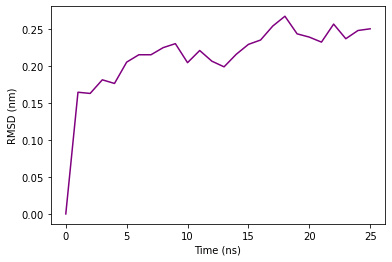

In [8]:
fig1= plt.plot(rmsd, color='purple')
plt.xlabel('Time (ns)')
plt.ylabel('RMSD (nm)')

In [9]:
rmsd

array([0.        , 0.16484338, 0.16321322, 0.18166839, 0.1767395 ,
       0.20562898, 0.21560858, 0.2156289 , 0.22527279, 0.23065686,
       0.20490292, 0.22137655, 0.20689349, 0.19925208, 0.21624805,
       0.2296665 , 0.23558341, 0.2545008 , 0.26778674, 0.24393865,
       0.23954137, 0.23273796, 0.25712255, 0.23733526, 0.24846986,
       0.25077906], dtype=float32)

The calculation bellow yeilds an every atom RMSF discription of your protein. Further down we will generate a residue based RMSF.

In [10]:
rmsf = md.rmsf(protein_traj, protein_traj, 0) 

In [11]:
rmsf

array([0.14060798, 0.14411186, 0.14382656, ..., 0.40952855, 0.4364457 ,
       0.48431864], dtype=float32)

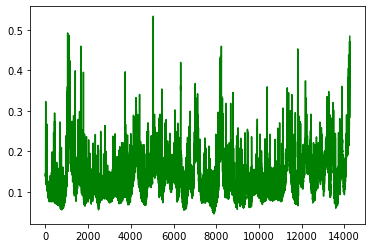

In [12]:
plt.plot(rmsf, color='green')

In [13]:
protein_sel2 = traj.topology.select('protein and name CA')
protein_traj2 = traj.atom_slice(protein_sel2)

In [14]:
rmsf = md.rmsf(protein_traj2, protein_traj2, 0) 

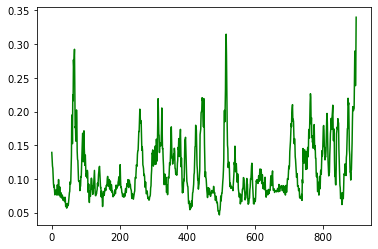

In [15]:
plt.plot(rmsf, color='green')

In [16]:
import MDAnalysis as mda
from MDAnalysis.analysis import diffusionmap, align
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

/Users/georgebaker/opt/anaconda3/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")


In [17]:
u = mda.Universe("step5_input.psf", "step7_production.dcd")

In [18]:
aligner = align.AlignTraj(u, u, select='name CA', in_memory=True).run()

In [19]:
matrix = diffusionmap.DistanceMatrix(u, select='name CA').run()
matrix.dist_matrix.shape

/Users/georgebaker/opt/anaconda3/lib/python3.9/site-packages/MDAnalysis/analysis/diffusionmap.py:286: DeprecationWarning: The `dist_matrix` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.dist_matrix` instead.
  warnings.warn(wmsg, DeprecationWarning)


(26, 26)

Text(0.5, 1.0, 'Envz')

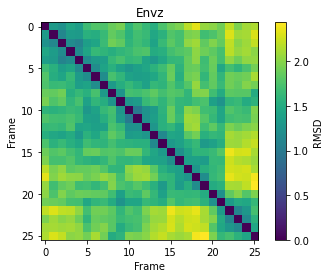

In [20]:
plt.imshow(matrix.dist_matrix, cmap='viridis')
plt.xlabel('Frame' , fontsize=10)
plt.ylabel('Frame' , fontsize=10)
plt.colorbar(label='RMSD')
ax = plt.gca()
ax.tick_params(axis = 'both' , labelsize = 10)
plt.title('Envz')

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import MDAnalysis as mda
import MDAnalysis.analysis.hole

ModuleNotFoundError: No module named 'MDAnalysis.analysis.hole'